In [1]:
"""
First insights:

* If an input is trained, it will stay stable, even if it receives less inputs in a second run
* If an input was trained less in a first run, it will strenghten its connections later if its stimuated more often then
* But in this case it will take much more time, since only few spikes are available which takes some time to build up
* If both inputs are trained strongly, further activating patterns have not really any impact anymore
-> An input aquires a specific amount of neurons and stably saturates
-> If it's relatively weak in the beginning it can still become saturates, but then it takes longer

Next steps:
* What happens when the network is bigger?
* What happens when the input it smaller/bigger?
* What happens when a third input comes into play?

"""

"\nFirst insights:\n\n* If an input is trained, it will stay stable, even if it receives less inputs in a second run\n* If an input was trained less in a first run, it will strenghten its connections later if its stimuated more often then\n* But in this case it will take much more time, since only few spikes are available which takes some time to build up\n* If both inputs are trained strongly, further activating patterns have not really any impact anymore\n-> An input aquires a specific amount of neurons and stably saturates\n-> If it's relatively weak in the beginning it can still become saturates, but then it takes longer\n\nNext steps:\n* What happens when the network is bigger?\n* What happens when the input it smaller/bigger?\n* What happens when a third input comes into play?\n\n"

In [2]:
# Allow reload of objects
%load_ext autoreload
%autoreload
from pelenet.utils import Utils
from pelenet.experiments.assemblies import AssemblyExperiment

# Official modules
import numpy as np
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
from time import time
from copy import deepcopy

In [3]:
# Overwrite default parameters (pelenet/parameters/ and pelenet/experiments/random.py)
parameters = {
    # Experiment
    'seed': 1,  # Random seed
    'trials': 20,  # Number of trials
    'stepsPerTrial': 50,  # Number of simulation steps for every trial
    'isReset': True,  # Activate reset after every trial
    # Network
    'reservoirExSize': 400,  # Number of excitatory neurons
    'reservoirConnPerNeuron': 35, #35 # Number of connections per neuron
    # Neurons
    'refractoryDelay': 2, # Refactory period
    'voltageTau': 100, #100 # Voltage time constant
    'currentTau': 6, #5 # Current time constant
    'thresholdMant': 1200, #1200  # Spiking threshold for membrane potential
    # Plasticity
    'isLearningRule': True,
    'learningRule': '2^-2*x1*y0 - 2^-2*y1*x0 + 2^-4*x1*y1*y0 - 2^-3*y0*w*w',
    # Input
    'inputIsVary': True,
    'inputVaryProbs': [0.1, 0.9],
    'inputGenSpikeProb': 0.8,  # Probability of spikes for the spike generators
    'inputNumTargetNeurons': 40,  # Number of neurons targeted by the spike generators
    'inputSteps': 30,  # Number of steps the input is active
    # Probes
    'isExSpikeProbe': True,  # Probe excitatory spikes
    'isInSpikeProbe': True,  # Probe inhibitory spikes
    'isWeightProbe': True  # Probe weight matrix at the end of the simulation
}

In [4]:
# Initilizes the experiment and utils
exp = AssemblyExperiment(name='assemblies', parameters=parameters)
utils = Utils.instance()

In [5]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

0.922

In [6]:
# Run network
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:40245
INFO:DRV:      Host server up..............Done 0.19s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1601455062.0551195
Include dir is : /home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1601455062.0551195/initnetwork_0_0.c
gcc -Wall -I/home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.

INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1601455062.0551195/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 --epoch=4 
INFO:HST:  Lakemont_driver...
INFO:HST:  chip=0 cpu=0 Transfered values 20, 70, 10 
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 0 to 10
INFO:HST:  chip=0 cpu=0 Reset functional state at 10
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 70 to 80
INFO:HST:  chip=0 cpu=0 Reset functional state at 80
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 140 to 150
INFO:HST:  chip=0 cpu=0 Reset functional state at 150
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 210 to 220
INFO:HST:  chip=0 cpu=0 Reset functional state at 220
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 280 to 290
INFO:HST:  chip=0 cpu=0 Reset functional state at 290
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 350 to 36

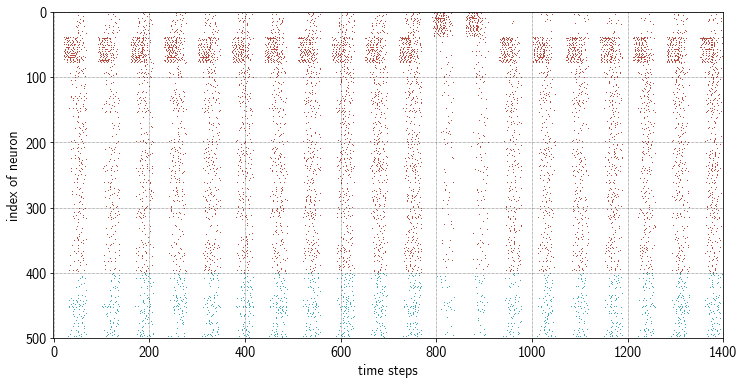

In [7]:
# Plot spike trains of the excitatory (red) and inhibitory (blue) neurons
exp.net.plot.reservoirSpikeTrain(figsize=(12,6))

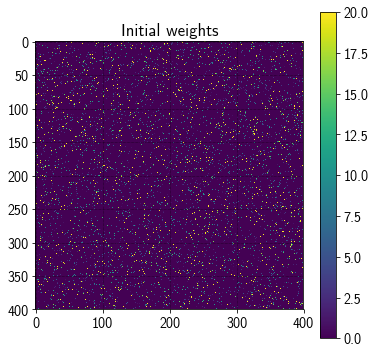

In [8]:
# Weight matrix before learning
exp.net.plot.initialExWeightMatrix()

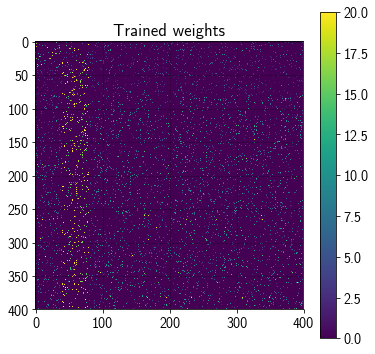

In [9]:
# Weight matrix after learning
exp.net.plot.trainedExWeightMatrix()

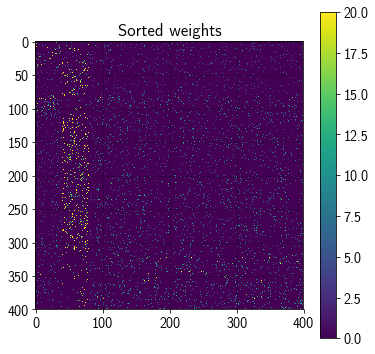

In [10]:
# Sorted weight matrix after learning
expSupportMask = utils.getSupportWeightsMask(exp.net.trainedWeightsExex)
exp.net.plot.weightsSortedBySupport(expSupportMask)

In [11]:
# New parameters
newParameters = {
    **parameters,
    'trials': 100,
    'inputVaryProbs': [0.9, 0.1]
}

In [12]:
# Initilizes a second experiment
exp2 = AssemblyExperiment(name='assemblies-retrain', parameters=newParameters)

In [13]:
#np.array_equal(exp.initialMasks.exex.toarray(), exp2.initialMasks.exex.toarray())

In [14]:
# Build network
weights = deepcopy(exp.net.initialWeights)
weights.exex = exp.net.trainedWeightsExex
exp2.buildWithGivenMaskAndWeights(exp.net.initialMasks, weights)

In [15]:
# Run network
exp2.run()

INFO:DRV:  Connecting to 127.0.0.1:43119
INFO:DRV:      Host server up..............Done 0.20s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1601455091.018261
Include dir is : /home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1601455091.018261/initnetwork_0_0.c
gcc -Wall -I/home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/

INFO:DRV:      Transferring spikes.........Done 1.24s
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1601455091.018261/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 --epoch=4 
INFO:HST:  Lakemont_driver...
INFO:HST:  chip=0 cpu=0 Transfered values 20, 70, 10 
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 0 to 10
INFO:HST:  chip=0 cpu=0 Reset functional state at 10
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 70 to 80
INFO:HST:  chip=0 cpu=0 Reset functional state at 80
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 140 to 150
INFO:HST:  chip=0 cpu=0 Reset functional state at 150
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 210 to 220
INFO:HST:  chip=0 cpu=0 Reset functional state at 220
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 280 to 290
INFO:HST:  chip=0 cpu=0 R

INFO:HST:  chip=0 cpu=0 Reset functional state at 2110
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2170 to 2180
INFO:HST:  chip=0 cpu=0 Reset functional state at 2180
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2240 to 2250
INFO:HST:  chip=0 cpu=0 Reset functional state at 2250
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2310 to 2320
INFO:HST:  chip=0 cpu=0 Reset functional state at 2320
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2380 to 2390
INFO:HST:  chip=0 cpu=0 Reset functional state at 2390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2450 to 2460
INFO:HST:  chip=0 cpu=0 Reset functional state at 2460
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2520 to 2530
INFO:HST:  chip=0 cpu=0 Reset functional state at 2530
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2590 to 2600
INFO:HST:  chip=0 cpu=0 Reset functional state at 2600
INFO:HST:  chip=0 cpu=0 Reset current/volt

INFO:HST:  chip=0 cpu=0 Reset functional state at 4420
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4480 to 4490
INFO:HST:  chip=0 cpu=0 Reset functional state at 4490
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4550 to 4560
INFO:HST:  chip=0 cpu=0 Reset functional state at 4560
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4620 to 4630
INFO:HST:  chip=0 cpu=0 Reset functional state at 4630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4690 to 4700
INFO:HST:  chip=0 cpu=0 Reset functional state at 4700
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4760 to 4770
INFO:HST:  chip=0 cpu=0 Reset functional state at 4770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4830 to 4840
INFO:HST:  chip=0 cpu=0 Reset functional state at 4840
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4900 to 4910
INFO:HST:  chip=0 cpu=0 Reset functional state at 4910
INFO:HST:  chip=0 cpu=0 Reset current/volt

INFO:HST:  chip=0 cpu=0 Reset functional state at 6730
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 6790 to 6800
INFO:HST:  chip=0 cpu=0 Reset functional state at 6800
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 6860 to 6870
INFO:HST:  chip=0 cpu=0 Reset functional state at 6870
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 6930 to 6940
INFO:HST:  chip=0 cpu=0 Reset functional state at 6940
INFO:DRV:      Executing...................Done 75.53s
INFO:DRV:      Processing timeseries.......Done 0.54s
INFO:DRV:  Executor: 7000 timesteps........Done 77.84s
INFO:HST:  chip=0 cpu=0 halted, status=0x0


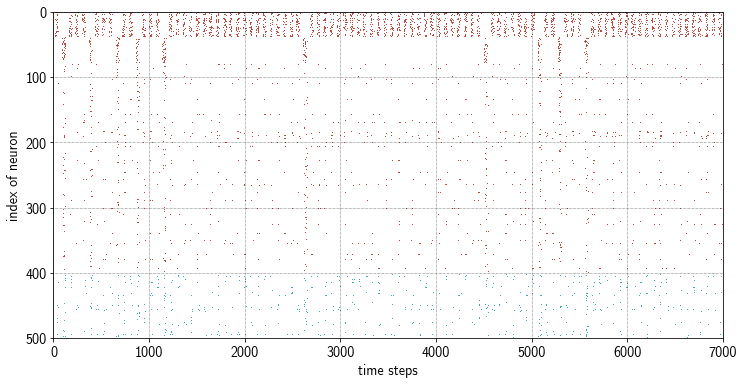

In [16]:
# Plot spike trains of the excitatory (red) and inhibitory (blue) neurons
exp2.net.plot.reservoirSpikeTrain(figsize=(12,6))

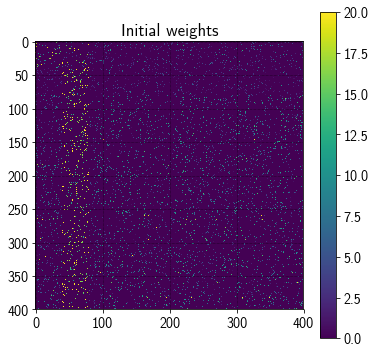

In [17]:
# Weight matrix before learning
exp2.net.plot.initialExWeightMatrix()

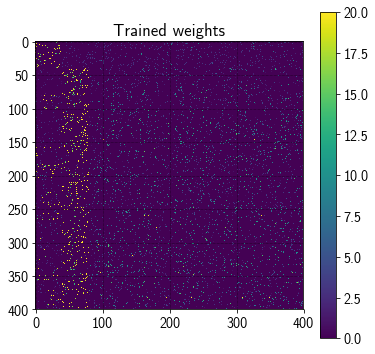

In [18]:
# Weight matrix after learning
exp2.net.plot.trainedExWeightMatrix()

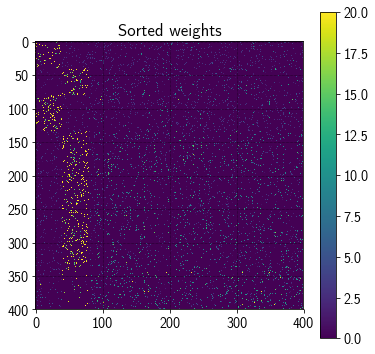

In [19]:
# Sorted weight matrix after learning
exp2SupportMask = utils.getSupportWeightsMask(exp2.net.trainedWeightsExex)
exp2.net.plot.weightsSortedBySupport(exp2SupportMask)